#### Dmytro Romaniv 151958 | Patryk Maciejewski 151960

### Introduction

Semantic segmentation is a critical process in the realm of computer vision, aiming to understand and interpret images at a pixel level. It involves the classification of each pixel in an image into predefined categories or classes, essentially allowing a machine to delineate and understand the content of an image with precision. This technology has a wide array of applications, from autonomous driving and medical image diagnosis to agricultural automation and satellite image analysis.

There are various types of segmentation in computer vision, including:

1. **Semantic Segmentation**: Pixels are classified into categories, but individual objects are not distinguished. For instance, every car in an image will have the same label, but cars will be distinct from the road or pedestrians.
2. **Instance Segmentation**: It goes a step further by not only classifying each pixel but also differentiating between different instances of the same class. For example, it can distinguish between Car 1 and Car 2, even though both are labeled as cars.
3. **Panoptic Segmentation**: A blend of semantic and instance segmentation, where it performs semantic segmentation for 'stuff' classes (e.g., sky, road) and instance segmentation for 'thing' classes (e.g., people, cars).

In this project, we initially explored the possibility of **instance segmentation** but ultimately focused on **semantic segmentation**. The choice was driven by the need for a robust and scalable solution that could be applied across various domains without the necessity for distinguishing between individual instances within the same class. Semantic segmentation offers a balanced approach, providing detailed analysis and understanding of the scene without the complexities of instance differentiation.

The project's objective, as outlined in the provided document, is to develop a semantic segmentation model that can efficiently and accurately interpret images from the VOC2012 dataset. The model, built using state-of-the-art neural network architectures and training strategies, aims not only to achieve high accuracy in segmentation tasks but also to be user-friendly and accessible. By integrating the model with Gradio GUI and posting it on Hugging Face, we ensure that it's not just a theoretical construct but a practical tool that can be utilized and built upon by a wide range of users, from researchers and developers to hobbyists and educators.

In conclusion, this project is not just about pushing the boundaries of semantic segmentation but also about making this advanced technology accessible and usable, thus contributing to the wider field of computer vision and AI.


### Libraries and Tools Used

In this project, several libraries and tools have been utilized, each serving a unique purpose in the development and deployment of the semantic segmentation model. Below is a detailed list and description of each:

1. **os**: A standard Python library used for interacting with the operating system. In this project, it's used for path operations, like joining paths to access or save files.

2. **cv2 (OpenCV)**: OpenCV is a powerful open-source computer vision library. Here, it is employed for image reading, transformations, and preprocessing steps such as resizing and color space conversions.

3. **numpy**: A fundamental package for scientific computing in Python. It is used extensively for high-level mathematical functions and operations on multi-dimensional arrays and matrices, which are crucial in image processing and model training.

4. **torch (PyTorch)**: An open-source machine learning library used for applications such as computer vision and natural language processing. It's primarily used here for model definition, training, and validation processes.

5. **Dataset, DataLoader, random_split (from torch.utils.data)**: These submodules of PyTorch are used for defining the dataset, creating iterators over the dataset, and splitting the dataset into training and validation sets, respectively.

6. **VOCSegmentation (from torchvision.datasets)**: This is a predefined dataset class in torchvision specifically for the VOC2012 dataset. It simplifies the process of dataset loading and preprocessing.

7. **Unet, utils (from segmentation_models_pytorch)**: Segmentation Models PyTorch is a library focused on state-of-the-art models for semantic segmentation. The Unet class is used for defining the U-Net model architecture, and utilities from `utils` are used for defining the loss function and metrics.

8. **matplotlib.pyplot**: A plotting library in Python that provides a MATLAB-like interface. It is used here for visualizing images, masks, and results.

9. **tqdm.notebook**: This library provides a fast, extensible progress bar for loops and iterations. It is used here to display the progress of training and validation loops in a clear and visually appealing manner.

10. **randint (from random)**: Used for generating random numbers. In this project, it's used to randomly select images for testing and visualization purposes.

11. **torch.device**: This is used to set the device for computation (CPU or GPU). Utilizing GPU can significantly speed up the training and inference processes if a compatible GPU is available.

12. **mlflow**: A platform for managing the machine learning lifecycle. It is used here for tracking and logging model parameters, metrics, and artifacts.

13. **datetime**: A standard Python library used for manipulating dates and times. It is used here for generating unique run IDs for each training run.

Each of these libraries and tools plays a pivotal role in the project, ensuring smooth development, efficient processing, and effective visualization of the results.


In [1]:
import os
import cv2 as cv
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision.datasets import VOCSegmentation
from segmentation_models_pytorch import Unet, FPN, utils
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from random import randint
import mlflow
import datetime

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

### Dataset Description and Preparation

The project utilizes the **VOC2012 dataset**, a prominent benchmark in image object recognition and segmentation. Initiated from the PASCAL Visual Object Classes Challenge, the dataset has been a crucial resource in advancing computer vision research. It offers rich annotations, including object boundaries, segmentation masks, and image classifications, across a diverse set of images covering 20 categories, ranging from everyday objects to animals. This diversity and richness make the VOC2012 dataset an invaluable asset for training and evaluating segmentation models.

The VOC2012 dataset was chosen for its balance between complexity and manageability, allowing for robust model training without the need for excessive computational resources. It's a widely recognized dataset in the computer vision community, making it suitable for benchmarking and comparing model performance. More information about the dataset and its applications can be found on its [official page](http://host.robots.ox.ac.uk/pascal/VOC/) and the [Papers with Code dataset page](https://paperswithcode.com/dataset/pascal-voc).

#### Preprocessing Steps
The preprocessing of the dataset involves several steps to make the data suitable for training the semantic segmentation model:

1. **Reading the Data**:
   - The dataset is loaded using the `VOCSegmentation` class, which provides an easy interface to access the images and their corresponding segmentation masks.
   - Image and segmentation mask paths are constructed using the root directory.

2. **Generating Color Maps**:
   - A color map is defined to visualize the segmentation masks. Each class is assigned a unique color for easy identification and interpretation.

3. **Converting Masks to One-Hot Encoding**:
   - Segmentation masks are converted to a one-hot encoded format. This conversion is crucial for the loss function during model training, allowing it to compare the predicted segmentation masks with the ground truth effectively.

4. **Resizing Images**:
   - Images and masks are resized to a fixed dimension (256x256 in this case). This standardization is necessary to maintain consistency in input size for the neural network.

5. **Normalizing**:
   - Image pixel values are normalized to be in the range [0, 1]. Normalization helps in speeding up the training process and improving model performance by providing a common scale for all input features.

6. **Dataset Splitting**:
   - The dataset is split into training and validation sets. This split allows the model to be trained on a portion of the data while its performance is validated on unseen data.

The careful preparation and preprocessing of the dataset ensure that the model receives high-quality and well-formatted input, which is crucial for the success of any machine learning project.

#### Unique Aspects of Dataset Preparation
The preparation of the VOC2012 dataset in this project involves unique aspects that contribute to the project's distinctiveness:

- The generation of a color map tailored to the dataset's classes enhances the interpretability of the model's predictions.
- One-hot encoding of segmentation masks provides a clear and efficient representation of the ground truth for model training.
- The resizing and normalization of images ensure that the model trains on a standardized set of data, improving its ability to learn and generalize from the dataset.

These unique preprocessing steps are pivotal in setting the foundation for a robust and accurate semantic segmentation model.

In [2]:
class VocDataset(Dataset):
    def __init__(self, dir):
        """
        Initialize the VOC Dataset.
        :param dir: Directory where the VOC dataset is located.
        """
        self.data = VOCSegmentation(
            root=dir, year="2012", image_set="trainval", download=True
        )
        self.root = os.path.join(dir, "VOCdevkit/VOC2012")
        self.target_dir = os.path.join(self.root, "SegmentationClass")
        self.images_dir = os.path.join(self.root, "JPEGImages")
        file_list = os.path.join(self.root, "ImageSets/Segmentation/trainval.txt")

        # Read the file list
        try:
            with open(file_list, "r") as file:
                self.files = [line.rstrip() for line in file]
        except IOError:
            print(f"Error: File {file_list} does not appear to exist.")
            self.files = []

        # Define the color map for the VOC dataset
        self.color_map = self.generate_color_map()

    def generate_color_map(self):
        """
        Generate the color map for the VOC dataset.
        Each color corresponds to a different class.
        :return: List of colors corresponding to different classes.
        """
        color_map = [
            [0, 0, 0],  # 0: background
            [128, 0, 0],  # 1: aeroplane
            [0, 128, 0],  # 2: bicycle
            [128, 128, 0],  # 3: bird
            [0, 0, 128],  # 4: boat
            [128, 0, 128],  # 5: bottle
            [0, 128, 128],  # 6: bus
            [128, 128, 128],  # 7: car
            [64, 0, 0],  # 8: cat
            [192, 0, 0],  # 9: chair
            [64, 128, 0],  # 10: cow
            [192, 128, 0],  # 11: dining table
            [64, 0, 128],  # 12: dog
            [192, 0, 128],  # 13: horse
            [64, 128, 128],  # 14: motorbike
            [192, 128, 128],  # 15: person
            [0, 64, 0],  # 16: potted plant
            [128, 64, 0],  # 17: sheep
            [0, 192, 0],  # 18: sofa
            [128, 192, 0],  # 19: train
            [0, 64, 128],  # 20: tv/monitor
        ]
        return color_map

    def convert_to_segmentation_mask(self, mask):
        """
        Convert the mask image to a segmentation mask with one-hot encoding.
        :param mask: Mask image.
        :return: One-hot encoded segmentation mask.
        """
        height, width = mask.shape[:2]
        segmentation_mask = np.zeros(
            (height, width, len(self.color_map)), dtype=np.float32
        )
        for label_index, label in enumerate(self.color_map):
            segmentation_mask[:, :, label_index] = np.all(
                mask == label, axis=-1
            ).astype(float)
        return segmentation_mask

    def __getitem__(self, index):
        """
        Get the item at the specified index.
        :param index: Index of the item.
        :return: Tuple of the image and its corresponding label.
        """
        image_id = self.files[index]
        image_path = os.path.join(self.images_dir, f"{image_id}.jpg")
        label_path = os.path.join(self.target_dir, f"{image_id}.png")

        # Read the image and mask, and apply necessary transformations
        image = cv.imread(image_path)
        image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
        image = cv.resize(image, (256, 256))
        image = (
            torch.tensor(image, dtype=torch.float32).permute(2, 0, 1) / 255.0
        )  # Normalize and change dimension order

        label = cv.imread(label_path)
        label = cv.cvtColor(label, cv.COLOR_BGR2RGB)
        label = cv.resize(label, (256, 256))
        label = self.convert_to_segmentation_mask(label)
        label = torch.tensor(label, dtype=torch.float32).permute(2, 0, 1)

        return image, label

    def __len__(self):
        """
        Get the total number of items in the dataset.
        :return: Total number of items.
        """
        return len(self.files)

    def split_dataset(
        self, train_ratio=0.8, test_ratio=0.1, batch_size=10, verbose=True
    ):
        """
        Split the dataset into training, validation, and test sets.
        :param train_ratio: Ratio of the dataset to be used as training set.
        :param test_ratio: Ratio of the dataset to be used as test set.
        :param batch_size: Batch size for the DataLoaders.
        :param verbose: Print dataset and loader sizes if True.
        :return: Training, validation, and test DataLoader objects.
        """
        train_size = int(train_ratio * len(self))
        test_size = int(test_ratio * len(self))
        val_size = len(self) - train_size - test_size

        train_set, val_set, test_set = random_split(
            self, [train_size, val_size, test_size]
        )

        train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=False)
        test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)

        if verbose:
            print(
                f"\nTotal dataset size: {len(self)}, Train ratio: {train_ratio}, Test ratio: {test_ratio}, Batch size: {batch_size}"
            )
            print(
                f"Train set size: {len(train_set)}, Validation set size: {len(val_set)}, Test set size: {len(test_set)}"
            )
            print(
                f"Train loader size: {len(train_loader)}, Validation loader size: {len(val_loader)}, Test loader size: {len(test_loader)}"
            )
            print("Displaying few examples:")
            for i in range(5):
                image, mask = self[i]  # Get the i-th item
                image_np = image.numpy().transpose(
                    1, 2, 0
                )  # Convert to numpy array and fix the dimensions
                mask_np = decode_segmap(
                    mask.numpy().argmax(0), np.array(self.color_map)
                )  # Get the decoded segmentation map

                plt.figure(figsize=(10, 5))
                plt.subplot(1, 2, 1)
                plt.title(f"Image {i+1}")
                plt.imshow(image_np)
                plt.axis("off")

                plt.subplot(1, 2, 2)
                plt.title(f"Mask {i+1}")
                plt.imshow(mask_np)
                plt.axis("off")

                plt.show()

        return train_loader, val_loader, test_loader


def decode_segmap(image, colors, nc=21):
    r = np.zeros_like(image).astype(np.uint8)
    g = np.zeros_like(image).astype(np.uint8)
    b = np.zeros_like(image).astype(np.uint8)
    for l in range(0, nc):
        idx = image == l
        r[idx] = colors[l, 0]
        g[idx] = colors[l, 1]
        b[idx] = colors[l, 2]
    rgb = np.stack([r, g, b], axis=2)
    return rgb

Using downloaded and verified file: data\VOCtrainval_11-May-2012.tar
Extracting data\VOCtrainval_11-May-2012.tar to data

Total dataset size: 2913, Train ratio: 0.8, Test ratio: 0.1, Batch size: 10
Train set size: 2330, Validation set size: 292, Test set size: 291
Train loader size: 233, Validation loader size: 30, Test loader size: 30
Displaying few examples:


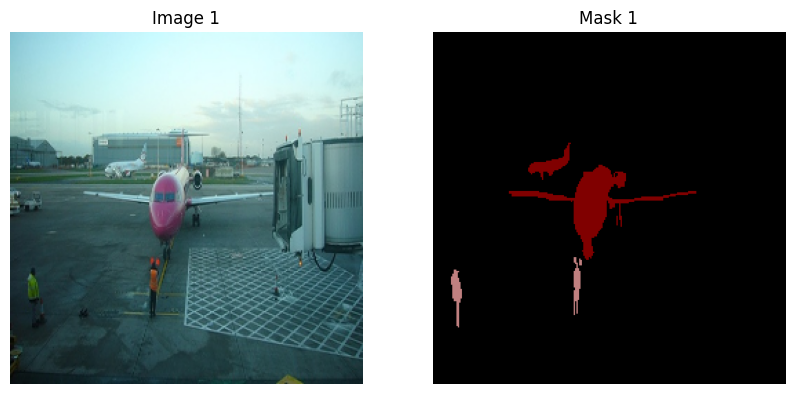

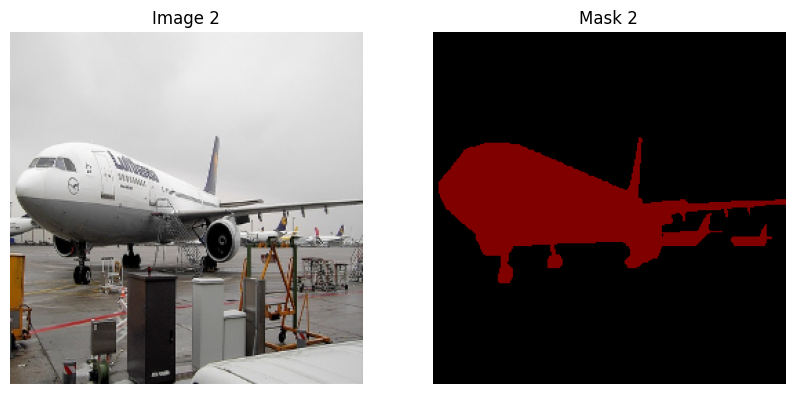

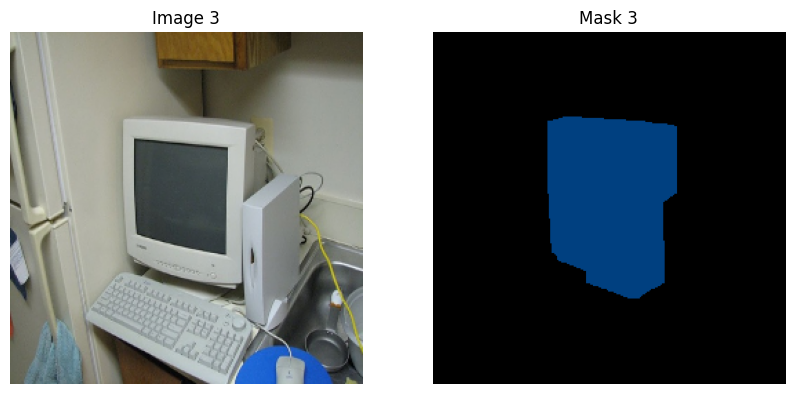

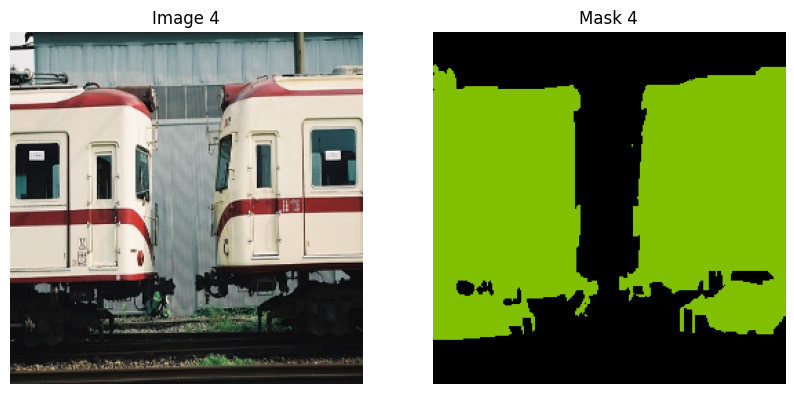

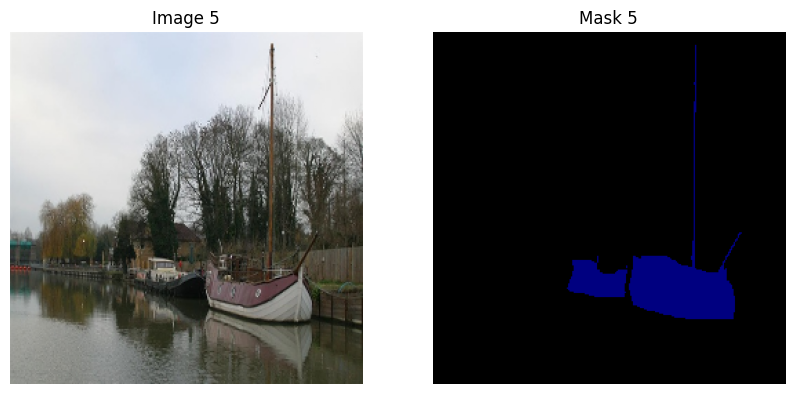

In [3]:
dataset = VocDataset("data")

train_loader, val_loader, test_loader = dataset.split_dataset(
    train_ratio=0.8, test_ratio=0.1, batch_size=10
)

### Model Architecture and Training

#### U-Net Architecture with ResNet18 Encoder
The model architecture is centered around the U-Net framework, renowned for its efficiency and effectiveness in biomedical image segmentation. The U-Net's architecture is fundamentally a convolutional network that excels in precise localization and context capture by utilizing a contracting path to capture context and a symmetric expanding path for precise localization. 

The architecture is structured to work exceptionally well even with a limited dataset, leveraging data augmentation techniques to extract complex features and contexts from a given input image. The unique aspect of U-Net is its ability to combine low-level feature maps with higher-level ones, which enables precise pixel-level segmentation. This characteristic is crucial for tasks where accurate segmentation is paramount.

In this project, the U-Net model is substantially enhanced by integrating a ResNet18 encoder. ResNet, standing for Residual Network, is a profound convolutional neural network architecture known for its depth and its capability to train swiftly and effectively, thanks to the residual connections which tackle the vanishing gradients problem. This allows the network to learn faster and more effectively with deeper architectures. The integration of the ResNet18 encoder with U-Net offers the following advantages:

- **Improved Feature Extraction**: Leveraging the deep residual learning framework, the model is capable of learning more robust and discriminative features, which is crucial for the segmentation task.
- **Effective Training**: The skip connections, characteristic of ResNet, promote smoother gradient flow across layers, simplifying the training of deep networks.
- **Better Generalization**: By employing a pre-trained ResNet18, the model benefits from prior knowledge and can generalize better to unseen data, a valuable trait for robust model performance.

For a more detailed understanding of the U-Net architecture, readers are encouraged to visit [this comprehensive guide](https://www.geeksforgeeks.org/u-net-architecture-explained/) and access [paper](https://arxiv.org/abs/1505.04597)

#### FPN Architecture with ResNet18 Encoder
The model architecture is built upon the foundational principles of Feature Pyramid Networks (FPN), renowned for their exceptional performance in object detection tasks. FPN's architecture stands out for its capacity to efficiently create a multi-scale feature pyramid from a single-scale input. This is achieved by merging high-level semantic feature maps from deep layers with low-level features from earlier layers, enabling the network to efficiently detect objects at various scales.

The FPN model is adept at handling diverse object sizes and shapes, making it ideal for object detection tasks where such variability is common. This adaptability stems from its pyramid-like structure, where each level represents features at a different scale, allowing for precise and scalable object detection.

In this project, the FPN model is significantly empowered by incorporating an EfficientNet encoder. EfficientNet is a cutting-edge convolutional neural network architecture recognized for its scalability and efficiency. EfficientNet scales uniformly across depth, width, and resolution, which results in balanced and efficient networks. By integrating the EfficientNet encoder with FPN, the following benefits are achieved:

- **Enhanced Multi-scale Feature Representation**: The EfficientNet encoder, known for its balanced scaling, aids in producing rich feature representations at multiple scales, vital for accurate object detection.
- **Efficiency in Computation**: EfficientNet's design focuses on optimizing computational resources, making the FPN model more efficient without compromising on performance.
- **Improved Adaptability**: The combined architecture leverages EfficientNet’s scalability, allowing the model to be easily adapted to different resolutions and object sizes, enhancing its overall applicability and effectiveness in diverse detection scenarios.

For a more detailed understanding of the FPN architecture, readers are encouraged to read the [paper](https://arxiv.org/abs/1612.03144)

#### Loss Function and Metrics
- **Dice Loss**: Chosen for its proficiency in managing class imbalance prevalent in segmentation tasks. It quantifies the similarity between the predicted segmentation and the ground truth, offering a direct measure of the model's pixel-wise classification accuracy.
- **Intersection over Union (IoU)**: A pivotal metric in segmentation tasks, IoU assesses the overlap between the predicted segmentation and the ground truth relative to their union. Its robustness makes it an excellent metric for a clear and interpretable measure of the model's segmentation efficacy.


![UNET architecture](UNET.jpg)

![FPN architecture](FPN.png)

In [7]:
def get_settings(
    architecture="unet",
    criterion="dice",
    optimizer="adam",
    scheduler="plateau",
    lr=0.0001,
):
    """
    Get the model, criterion, metrics, optimizer, and scheduler for the specified architecture.
    :param architecture: Architecture of the model.
    :param encoder_name: Name of the encoder.
    :return: Model, criterion, metrics, optimizer, and scheduler.
    """
    if architecture == "unet":
        model = Unet(
            encoder_name="resnet18", in_channels=3, classes=21, activation="softmax"
        )
    elif architecture == "fpn":
        model = FPN(
            encoder_name="resnet18", in_channels=3, classes=21, activation="softmax"
        )
    else:
        raise ValueError(f"Architecture {architecture} not supported.")

    model = model.to(device)

    if criterion == "dice":
        criterion = utils.losses.DiceLoss(eps=1.0)
    elif criterion == "ce":
        criterion = utils.losses.CrossEntropyLoss()
    elif criterion == "bce":
        criterion = utils.losses.BCELoss()
    else:
        raise ValueError(f"Criterion {criterion} not supported.")

    metrics = [
        utils.metrics.IoU(threshold=0.5),
        utils.metrics.Fscore(threshold=0.5),
    ]

    if optimizer == "adam":
        optimizer = torch.optim.Adam(model.parameters(), lr)
    elif optimizer == "sgd":
        optimizer = torch.optim.SGD(model.parameters(), lr, momentum=0.9)
    elif optimizer == "rmsprop":
        optimizer = torch.optim.RMSprop(model.parameters(), lr)
    else:
        raise ValueError(f"Optimizer {optimizer} not supported.")

    if scheduler == "plateau":
        scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
            optimizer, patience=3, verbose=True
        )
    elif scheduler == "step":
        scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)
    elif scheduler == "cosine":
        scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=5)
    else:
        raise ValueError(f"Scheduler {scheduler} not supported.")

    return model, criterion, metrics, optimizer, scheduler

#### Training Process
The training regimen is a meticulously structured sequence of steps and components, each playing a vital role in the model's learning and performance optimization:

1. **Data Splitting**: The dataset is divided into training and validation sets, ensuring the model learns from a specific subset of data while its performance is objectively assessed on unseen data. This practice helps in preventing overfitting and in evaluating the model's generalization capabilities.

2. **Optimizer**: The Adam optimizer is employed for its adept handling of sparse gradients and its adaptive learning rate mechanism. This optimizer is known for its effectiveness in converging faster and reducing the need for manual tuning of the learning rate.

3. **Learning Rate Scheduler**: The ReduceLROnPlateau scheduler is a strategic component that dynamically adjusts the learning rate in response to the validation loss. By lowering the learning rate when the loss plateaus, this scheduler introduces an additional layer of robustness to the training process, steering the model towards optimal performance.

4. **Training-Validation Loop**: The heart of the training process, this loop iteratively performs:
    - Forward Propagation: The model processes the input data and makes predictions.
    - Loss Calculation: The Dice loss is computed, which quantifies the overlap between the predicted segmentation and the ground truth.
    - Backward Propagation: The gradients of the loss with respect to the model parameters are calculated, preparing the model for an update.
    - Parameter Update: The optimizer adjusts the model's weights based on the computed gradients.
    - Validation: The model's predictions are compared against the validation set, and performance metrics (like IoU) are computed.

5. **Model Saving Criteria**: A checkpointing mechanism is employed, where the model's state is saved whenever there is an improvement in the IoU metric on the validation set. This ensures that the training process results in a model that represents the best performance on the validation data.

6. **Hyperparameter Tuning**: A crucial aspect of the training, where various hyperparameters (such as learning rate, batch size, number of epochs) are iteratively adjusted and experimented with to find the most effective combination that leads to the best model performance.

7. **Feedback and Monitoring**: Throughout the training process, feedback is provided in terms of loss metrics and IoU scores, allowing for continuous monitoring of the model's performance. This information is vital for making informed decisions about early stopping, adjusting hyperparameters, or changing aspects of the model architecture.

8. **Checkpointing and Model Persistence**: The model, along with its state and parameters, is periodically saved, especially when there is an improvement in performance metrics. This practice not only safeguards the model against potential data loss or computational issues but also facilitates model versioning and reproducibility.

By meticulously following these steps, the training process is not just about feeding data through a neural network; it's a well-thought-out procedure aiming at gradually refining the model's weights and biases to achieve high accuracy and robust performance in semantic segmentation tasks.

In [58]:
def train(
    model,
    optim,
    loss_f,
    epochs,
    scheduler,
    path_for_models,
    experiment_name="VOC Segmentation",
):
    """
    Trains a machine learning model with MLflow integration.

    Parameters:
    model (torch.nn.Module): The neural network model to train.
    optim (torch.optim.Optimizer): Optimizer for the model.
    loss_f (callable): Loss function.
    epochs (int): Number of epochs for training.
    scheduler (torch.optim.lr_scheduler): Learning rate scheduler.
    path_for_models (str): Directory path to save the model.
    experiment_name (str): Name of the MLflow experiment.
    """

    # Set MLflow experiment
    mlflow.set_experiment(experiment_name)

    # Create directory for models if it doesn't exist
    if not os.path.exists(path_for_models):
        os.makedirs(path_for_models)

    min_iou = 0.5

    run_name = f"{model.__class__.__name__[0]}-{datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S')}"

    with mlflow.start_run(run_name=run_name):
        # Log model parameters
        mlflow.log_params(
            {
                "model": model.__class__.__name__,
                "optimizer": optim.__class__.__name__,
                "loss_function": loss_f.__class__.__name__,
                "scheduler": scheduler.__class__.__name__,
                "learning_rate": optim.param_groups[0]["lr"],
                "batch_size": train_loader.batch_size,
                "epochs": epochs,
            }
        )

        # Training loop
        for epoch in tqdm(range(epochs)):
            # Training phase
            for X_train, y_train in train_loader:
                X_train, y_train = X_train.to(device), y_train.to(
                    device, dtype=torch.int64
                )
                y_pred = model(X_train)
                loss = loss_f(y_pred, y_train)

                optim.zero_grad()
                loss.backward()
                optim.step()

            # Validation phase
            ious = []
            fscores = []
            val_losses = []
            with torch.no_grad():
                for _, (X_test, y_test) in enumerate(val_loader):
                    X_test, y_test = X_test.to(device), y_test.to(device)
                    y_val = model(X_test)
                    val_loss = loss_f(y_val, y_test)
                    val_losses.append(val_loss.item())
                    iou_ = metrics[0](y_val, y_test)
                    fscore_ = metrics[1](y_val, y_test)
                    ious.append(iou_.item())
                    fscores.append(fscore_.item())

                mean_val_loss = np.mean(val_losses)
                mean_iou = np.mean(ious)
                mean_fscore = np.mean(fscores)

                # Log metrics for each epoch
                mlflow.log_metrics(
                    {
                        "train_loss": loss.item(),
                        "val_loss": mean_val_loss,
                        "val_iou": mean_iou,
                        "val_fscore": mean_fscore,
                    },
                    step=epoch,
                )

                # Update scheduler and save model if performance improved
                scheduler.step(mean_val_loss)
                if mean_iou > min_iou:
                    min_iou = mean_iou
                    model_save_path = os.path.join(
                        path_for_models,
                        f"{model.__class__.__name__}-{optimizer.__class__.__name__}-{scheduler.__class__.__name__}-{loss_f.__class__.__name__}.pt",
                    )
                    torch.save(model.state_dict(), model_save_path)
                    # Log the model as an artifact
                    mlflow.log_artifact(model_save_path)

            print(
                f"Epoch: {epoch:2}, Train Loss: {loss:.4f}, Val Loss: {mean_val_loss:.4f}, Val IOU: {mean_iou:.4f}, Val Fscore: {mean_fscore:.4f}"
            )


model, criterion, metrics, optimizer, scheduler = get_settings(
    "unet", "dice", "adam", "plateau", 0.0001
)
train(model, optimizer, criterion, 10, scheduler, "models")

model, criterion, metrics, optimizer, scheduler = get_settings(
    "unet", "ce", "sgd", "step", 0.001
)
train(model, optimizer, criterion, 10, scheduler, "models")

model, criterion, metrics, optimizer, scheduler = get_settings(
    "unet", "bce", "rmsprop", "cosine", 0.01
)
train(model, optimizer, criterion, 10, scheduler, "models")


model, criterion, metrics, optimizer, scheduler = get_settings(
    "fpn", "ce", "sgd", "step", 0.0001
)
train(model, optimizer, criterion, 10, scheduler, "models")

model, criterion, metrics, optimizer, scheduler = get_settings(
    "fpn", "dice", "adam", "plateau", 0.001
)
train(model, optimizer, criterion, 10, scheduler, "models")

model, criterion, metrics, optimizer, scheduler = get_settings(
    "fpn", "bce", "rmsprop", "cosine", 0.01
)
train(model, optimizer, criterion, 10, scheduler, "models")

### We trained models on Google colab (Tesla T4 GPU) and a Windows laptop (RTX 2060) interchangeably.

### Graphs for UNET with ResNet18 Encoder, Dice Loss, Adam Optimizer, and ReduceLROnPlateau Scheduler - 45 minutes of training (10 epochs)
![default UNET graphs](UNET_graphs.png)

### Graphs for FPN with ResNet18 Encoder, Dice Loss, Adam Optimizer, and ReduceLROnPlateau Scheduler - 35 minutes of training (10 epochs)
![default FPN graphs](FPN_graphs.png)

### After training and trying them all, we selected UNET with ResNet18 Encoder, Dice Loss, Adam Optimizer, and ReduceLROnPlateau Scheduler with the following hyperparameters as the best model:
- **Learning Rate**: 0.001 - this learning rate is good because it is not too high or too low and seems to be the best learning rate for this model
- **Batch Size**: 16 - this batch size was ideal to train the model on the GPU without running out of memory
- **Number of Epochs**: 100 - this number of epochs was ideal to train the model without overfitting

### Model Performance

In [59]:
model, criterion, metrics, optimizer, scheduler = get_settings(
    "unet", "dice", "adam", "plateau", 0.0001
)

model.load_state_dict(torch.load(f"models/best.pt"))

model.eval()

Unet(
  (encoder): ResNetEncoder(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track

In [60]:
def decode_segmap(image, colors, nc=21):
    r = np.zeros_like(image).astype(np.uint8)
    g = np.zeros_like(image).astype(np.uint8)
    b = np.zeros_like(image).astype(np.uint8)
    for l in range(0, nc):
        idx = image == l
        r[idx] = colors[l, 0]
        g[idx] = colors[l, 1]
        b[idx] = colors[l, 2]
    rgb = np.stack([r, g, b], axis=2)
    return rgb


def predict(model, img):
    img = cv.resize(img, (256, 256))
    img = torch.tensor(img, dtype=torch.float32).permute(2, 0, 1) / 255.0
    img = img.unsqueeze(0)
    img = img.to(device)
    pred = model(img)
    pred = pred.squeeze(0)
    pred = pred.argmax(0)
    pred = pred.detach().cpu().numpy()
    return pred

In [61]:
# Calculate IOU and Fscore for the test set
ious = []
fscores = []
with torch.no_grad():
    for _, (X_test, y_test) in enumerate(test_loader):
        X_test, y_test = X_test.to(device), y_test.to(device)
        y_val = model(X_test)
        iou_ = metrics[0](y_val, y_test)
        fscore_ = metrics[1](y_val, y_test)
        ious.append(iou_.item())
        fscores.append(fscore_.item())

mean_iou = np.mean(ious)
mean_fscore = np.mean(fscores)
print(f"Test IOU: {mean_iou:.4f}, Test Fscore: {mean_fscore:.4f}")

Test IOU: 0.7875, Test Fscore: 0.8798


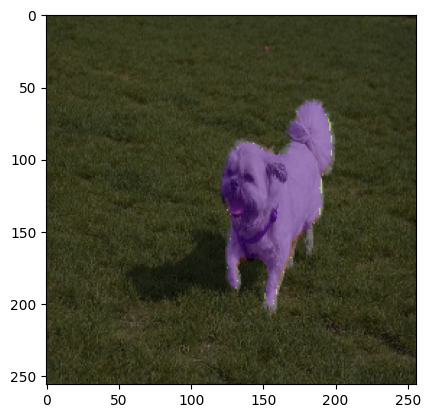

In [65]:
# Predict on a random image from the test set
idx = randint(0, len(test_loader))
img, label = test_loader.dataset[idx]
img = (img.permute(1, 2, 0).detach().cpu().numpy() * 255).astype(np.uint8)

pred = predict(model, img)
pred = decode_segmap(pred, np.array(dataset.color_map))

plt.imshow(img)
plt.imshow(cv.resize(pred, (img.shape[1], img.shape[0])), alpha=0.5)
plt.show()

### Results, Evaluation, and Project Integration

#### Results and Evaluation
- **Performance Metrics**: The model's performance is quantitatively evaluated using training and validation loss, and the IoU (Intersection over Union) scores. These metrics provide a comprehensive understanding of the model's ability to segment images accurately. A decrease in loss over epochs indicates learning, while the IoU score gives a direct measure of how well the predicted segmentations align with the ground truth.
- **Visual Results**: The effectiveness of the model is also qualitatively evaluated by visualizing the segmentation masks on test images. These visual results provide intuitive insights into the model's segmentation capabilities, showcasing how well the model can delineate and classify different objects in an image.

#### Challenges and Solutions
- **Class Imbalance**: Semantic segmentation datasets often suffer from class imbalance, where some classes are more frequent than others. This was addressed by using Dice Loss, which is known to handle class imbalance effectively.
- **Model Complexity and Overfitting**: Managing the complexity of the model to prevent overfitting was crucial. Techniques such as early stopping, model checkpoints based on validation performance, and data augmentation were used to mitigate this issue.
- **Integration Complexity**: Making the model accessible and usable through platforms like Gradio and Hugging Face posed challenges in terms of integration and compatibility. These were overcome by thorough testing and iterative improvements to the integration code.

#### Integration with Gradio GUI and Hugging Face
- **Gradio GUI**: The model is made user-friendly and accessible through Gradio, an open-source Python library for creating customizable UI components for machine learning models. The Gradio interface allows users to easily input images and view the model's predictions, facilitating an interactive and intuitive experience.
- **Hugging Face**: The model is posted on Hugging Face, a platform for sharing and collaborating on machine learning models. This makes the model easily accessible to a broader audience, allowing others to use and build upon the work. The process involves setting up a repository, uploading the trained model, and providing adequate documentation for users.
- **Docker**: Hugging Face provides a Docker image for the model, allowing for easy deployment and integration with other applications. This Docker image can be pulled and run on any machine with Docker installed, making it a convenient and portable solution for model deployment. Click the 3 dots in the top right of the [Space](https://huggingface.co/spaces/dromaniv/SegMeister) and select "Run in Docker" to run the model in a Docker container.
- **MLFlow**: The model's training process is tracked and logged using MLFlow, an open-source platform for managing the machine learning lifecycle. This allows for easy tracking of model parameters, metrics, and artifacts, facilitating reproducibility and collaboration.

#### Potential Impact and Applications
- **Wide Applicability**: The model's capabilities in semantic segmentation can be applied in various domains, such as medical imaging, autonomous driving, and agricultural monitoring.
- **Foundation for Future Work**: The project lays a strong foundation for future work, inviting further enhancements, optimizations, and applications in different domains.

### Conclusion
The project successfully demonstrates the development, evaluation, and deployment of a semantic segmentation model, highlighting the importance of not only technical robustness but also accessibility and usability. The integration with platforms like Gradio and Hugging Face ensures that the model can reach a wide audience, fostering collaboration and further innovation in the field.


## GRADIO

## [HuggingFace Space (Git) Link](https://huggingface.co/spaces/dromaniv/SegMeister?fbclid=IwAR1-uN0W_tla-8ebJl0mQW2doJN29hkP-q9pvEiyocydtEZmIxFMKkNSc84)
![Example of Gradio UI running on HF Space](huggingface_demo.png)

## DOCKER
```
docker run -it -p 7860:7860 --platform=linux/amd64 registry.hf.space/dromaniv-segmeister:latest python app.py
```


## MLFLOW
![MLFlow](mlflow.png)

### Bibliography

In the development of this project, a wide range of resources were consulted for insights into dataset specifics, model architectures, and best practices in semantic segmentation. Key references include:

1. **VOC2012 Dataset**:
   - [The PASCAL Visual Object Classes Homepage](http://host.robots.ox.ac.uk/pascal/VOC/): Official page of the VOC Challenge, providing detailed information about the dataset, its structure, and its applications in various computer vision tasks.

2. **Papers and Articles on VOC2012 Dataset**:
   - [Papers with Code - PASCAL VOC Dataset](https://paperswithcode.com/dataset/pascal-voc): A comprehensive collection of papers and code snippets that utilize the PASCAL VOC dataset, offering a broad perspective on the dataset's versatility and application in cutting-edge research.

3. **U-Net Model and Architecture**:
   - [U-Net Architecture Explained](https://www.geeksforgeeks.org/u-net-architecture-explained/): A detailed article explaining the U-Net architecture, its unique features, and its significance in the field of image segmentation.
   - Olaf Ronneberger, Philipp Fischer, and Thomas Brox. U-Net: Convolutional Networks for Biomedical Image Segmentation. In *Medical Image Computing and Computer-Assisted Intervention* (MICCAI), Springer, LNCS, Vol.9351: 234–241, 2015 ([Read Paper](https://arxiv.org/abs/1505.04597)): The original paper introducing the U-Net architecture, detailing its design, applications, and the results it achieved in biomedical image segmentation.

4. **ResNet and Its Role in Deep Learning**:
   - Kaiming He, Xiangyu Zhang, Shaoqing Ren, Jian Sun. Deep Residual Learning for Image Recognition. In *Proceedings of the IEEE conference on computer vision and pattern recognition* (CVPR), pages 770-778, 2016 ([Read Paper](https://arxiv.org/abs/1512.03385)): The seminal paper on ResNet, introducing the concept of residual learning and its profound impact on training deep neural networks.

These resources played an instrumental role in shaping the methodology, execution, and evaluation of the semantic segmentation model in this project. They provided valuable insights into the dataset characteristics, model architectures, training strategies, and performance benchmarks.


### Points Summary Table

| Criteria                              | Description                                                                              | Points Obtained |
|---------------------------------------|------------------------------------------------------------------------------------------|-----------------|
| **Problem**                           | Semantic segmentation (also attempted Instance Segmentation, but with poor results)      | 1+              |
| **Model**                             | U-Net with ResNet18 Encoder (ready architecture trained from scratch)                    | 1               |
| **Additional Model Points**           | Tested 1 additional model - FPN                                                          | 1               |
| **Dataset**                           | Dataset requirements are fulfilled                                                       | None            |
| **Training**                          | Training requirements are fulfilled                                                      | None            |
| **Additional Training Points**        | Hyperparameter tuning                                                                    | 1               |
| **Additional Training Points**        | Testing a few optimizers (3)                                                             | 1               |
| **Additional Training Points**        | Testing various loss functions (3)                                                       | 1               |
| **Tools**                             | Tools requirements are fulfilled                                                         | None            |
| **Additional Tools Points**           | MLflow                                                                                   | 1               |
| **Additional Tools Points**           | Run as docker                                                                            | 1               |
| **Additional Tools Points**           | Gradio UI                                                                                | 1               |
| **Additional Tools Points**           | Other MLOps tools (HuggingFace integration)                                              | 1               |
| **Report**                            | Report requirements are fulfilled                                                        | None            |
| **Total**                             |                                                                                          | **10**  |
| **Requested Grade**                   |                                                                                          | **4**|